## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd

In [2]:
path = '/Users/reneehall/Documents/Learning/lighthouse_labs/coursework-lighthouse-labs/Mid-term project/colab_data/'
fl_df = pd.read_csv(path+'cleaned_flights_sample.csv')
pass_df = pd.read_csv(path+'cleaned_passengers.csv')
fuel_df = pd.read_csv(path+'cleaned_fuel_consumption.csv')

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [3]:
arr_delay = fl_df['arr_delay']

In [4]:
# mean is 5.58
# 50% of delays between -15 to 7 mins
arr_delay.describe()

count    600000.000000
mean          5.585641
std          50.124606
min        -260.000000
25%         -15.000000
50%          -6.000000
75%           7.000000
max        2649.000000
Name: arr_delay, dtype: float64

<AxesSubplot:xlabel='arr_delay', ylabel='Count'>

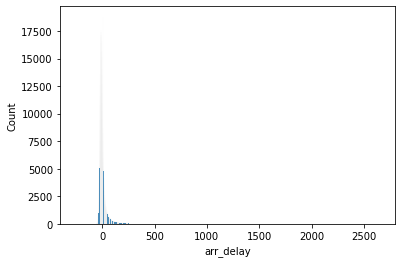

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(arr_delay)

In [16]:
from scipy import stats

alpha = 0.05
k2, p = stats.normaltest(arr_delay)
print("p-value: {:.6f}".format(p))
if p < alpha:
    print("Distribution is not normal")
else:
    print("Distribution is normal")

p-value: 0.000000
Distribution is not normal


In [338]:
# ~15,000 flights delayed more than 2 hrs
# ~3600 flights delayed more than 4 hours
arr_delay = fl_df[fl_df['arr_delay'] < -60]
arr_delay.shape
#arr_delay.sort_values('arr_delay').arr_delay.head()

(93, 32)

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [23]:
fl_df.fl_date = pd.to_datetime(fl_df.fl_date)

In [116]:
delay_monthly_mean = fl_df.groupby(fl_df['fl_date'].dt.strftime('%m')).arr_delay.mean()

In [121]:
delay_monthly_mean = pd.DataFrame(data=(delay_monthly_mean))

In [123]:
delay_monthly_mean = delay_monthly_mean.reset_index()

In [142]:
from scipy.stats import pearsonr
month = [int(x) for x in delay_monthly_mean['fl_date'].tolist()]
delay = [x for x in delay_monthly_mean['arr_delay'].tolist()]
stat, p = pearsonr(month, delay)
alpha = 0.05
if p < 0.05:
    print("Month and delay correlated")
else:
    print("Maybe not correlated")

Maybe not correlated


In [54]:
delay_monthly_median = fl_df.groupby(fl_df['fl_date'].dt.strftime('%m')).arr_delay.median()

In [143]:
delay_monthly_median = pd.DataFrame(data=(delay_monthly_median))
delay_monthly_median = delay_monthly_median.reset_index()

month = [int(x) for x in delay_monthly_median['fl_date'].tolist()]
delay = [x for x in delay_monthly_median['arr_delay'].tolist()]
stat, p = pearsonr(month, delay)
alpha = 0.05
if p < 0.05:
    print("Month and delay correlated")
else:
    print("Maybe not correlated")

Maybe not correlated


In [63]:
big_delays = fl_df[fl_df['arr_delay'] > 7.0]

In [64]:
big_delay_monthly_mean = big_delays.groupby(big_delays['fl_date'].dt.strftime('%m')).mean()

In [144]:
big_delay_monthly_mean = pd.DataFrame(data=(big_delay_monthly_mean))
big_delay_monthly_mean = big_delay_monthly_mean.reset_index()

month = [int(x) for x in big_delay_monthly_mean['fl_date'].tolist()]
delay = [x for x in big_delay_monthly_mean['arr_delay'].tolist()]
stat, p = pearsonr(month, delay)
alpha = 0.05
if p < 0.05:
    print("Month and delay correlated")
else:
    print("Maybe not correlated")

Maybe not correlated


In [67]:
big_delay_monthly_median = big_delays.groupby(big_delays['fl_date'].dt.strftime('%m')).median()

In [145]:
big_delay_monthly_median = pd.DataFrame(data=(big_delay_monthly_median))
big_delay_monthly_median = big_delay_monthly_median.reset_index()

month = [int(x) for x in big_delay_monthly_median['fl_date'].tolist()]
delay = [x for x in big_delay_monthly_median['arr_delay'].tolist()]
stat, p = pearsonr(month, delay)
alpha = 0.05
if p < 0.05:
    print("Month and delay correlated")
else:
    print("Maybe not correlated")

Maybe not correlated


In [70]:
big_delays.arr_delay.describe()

count    148573.000000
mean         54.563413
std          81.512497
min           8.000000
25%          15.000000
50%          29.000000
75%          63.000000
max        2649.000000
Name: arr_delay, dtype: float64

In [72]:
biggest_delays = fl_df[fl_df['arr_delay'] > 63.0]

In [74]:
biggest_delays.arr_delay.describe()

count    36631.000000
mean       144.362616
std        124.804633
min         64.000000
25%         81.000000
50%        109.000000
75%        159.000000
max       2649.000000
Name: arr_delay, dtype: float64

In [77]:
biggest_delay_monthly_mean = biggest_delays.groupby(biggest_delays['fl_date'].dt.strftime('%m')).mean()
biggest_delay_monthly_mean.arr_delay

fl_date
01    140.180766
02    144.035299
03    139.207075
04    145.740905
05    141.653535
06    146.237635
07    149.650757
08    141.607055
09    143.027141
10    141.356809
11    151.316269
12    147.113880
Name: arr_delay, dtype: float64

In [146]:
biggest_delay_monthly_mean = pd.DataFrame(data=(biggest_delay_monthly_mean))
biggest_delay_monthly_mean = biggest_delay_monthly_mean.reset_index()

month = [int(x) for x in biggest_delay_monthly_mean['fl_date'].tolist()]
delay = [x for x in biggest_delay_monthly_mean['arr_delay'].tolist()]
stat, p = pearsonr(month, delay)
alpha = 0.05
if p < 0.05:
    print("Month and delay correlated")
else:
    print("Maybe not correlated")

Maybe not correlated


In [78]:
biggest_delay_monthly_median = biggest_delays.groupby(biggest_delays['fl_date'].dt.strftime('%m')).median()
biggest_delay_monthly_median.arr_delay

fl_date
01    108.0
02    107.0
03    106.0
04    111.0
05    110.0
06    110.0
07    110.0
08    105.0
09    108.0
10    107.0
11    109.0
12    110.0
Name: arr_delay, dtype: float64

In [147]:
biggest_delay_monthly_median = pd.DataFrame(data=(biggest_delay_monthly_median))
biggest_delay_monthly_median = biggest_delay_monthly_median.reset_index()

month = [int(x) for x in biggest_delay_monthly_median['fl_date'].tolist()]
delay = [x for x in biggest_delay_monthly_median['arr_delay'].tolist()]
stat, p = pearsonr(month, delay)
alpha = 0.05
if p < 0.05:
    print("Month and delay correlated")
else:
    print("Maybe not correlated")

Maybe not correlated


#### Conclustion

In [148]:
# It does not seem like month matters.

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [387]:
taxi_df = fl_df[['fl_date','taxi_out','taxi_in','origin_airport_id','dest_airport_id','dep_time','arr_time','flights']]
taxi_df.head()

fl_date  taxi_out   taxi_in  origin_airport_id  dest_airport_id  \
fl_date                                                                         
2018-10-26 2018-10-26      16.0  5.000000              12954            11057   
2018-03-26 2018-03-26      14.0  5.000000              13930            11630   
2019-02-06 2019-02-06      14.0  7.682555              10868            14771   
2019-11-11 2019-11-11      11.0  8.000000              14869            12892   
2019-03-25 2019-03-25      14.0  4.000000              14771            14107   

            dep_time  arr_time  flights  
fl_date                                  
2018-10-26    1439.0    1650.0      1.0  
2018-03-26    1054.0    1207.0      1.0  
2019-02-06    1740.0    1853.0      1.0  
2019-11-11    1731.0     613.0      1.0  
2019-03-25    1410.0    1138.0      1.0

In [388]:
#taxi_df['dep_datetime'] = pd.to_datetime(taxi_df['dep_time'], format = '%H%M')
taxi_df['arr_hour'] = taxi_df['arr_time'].astype('str').str[:-4]
taxi_df.head()

<ipython-input-388-3aa68017ad35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_df['arr_hour'] = taxi_df['arr_time'].astype('str').str[:-4]


fl_date  taxi_out   taxi_in  origin_airport_id  dest_airport_id  \
fl_date                                                                         
2018-10-26 2018-10-26      16.0  5.000000              12954            11057   
2018-03-26 2018-03-26      14.0  5.000000              13930            11630   
2019-02-06 2019-02-06      14.0  7.682555              10868            14771   
2019-11-11 2019-11-11      11.0  8.000000              14869            12892   
2019-03-25 2019-03-25      14.0  4.000000              14771            14107   

            dep_time  arr_time  flights arr_hour  
fl_date                                           
2018-10-26    1439.0    1650.0      1.0       16  
2018-03-26    1054.0    1207.0      1.0       12  
2019-02-06    1740.0    1853.0      1.0       18  
2019-11-11    1731.0     613.0      1.0        6  
2019-03-25    1410.0    1138.0      1.0       11

In [389]:
taxi_df['arr_hour'] = taxi_df.arr_hour.replace('', 0)
taxi_df['arr_hour'] = taxi_df.arr_hour.replace('1464.845427563', 14)
taxi_df['arr_hour'] = taxi_df.arr_hour.astype('int')
#taxi_df['arr_hour'] = taxi_df.arr_hour.astype('int')
taxi_df.arr_hour.unique()

<ipython-input-389-cf4992c231b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_df['arr_hour'] = taxi_df.arr_hour.replace('', 0)
<ipython-input-389-cf4992c231b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_df['arr_hour'] = taxi_df.arr_hour.replace('1464.845427563', 14)
<ipython-input-389-cf4992c231b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

array([16, 12, 18,  6, 11, 13, 21, 19,  8, 15,  1, 17,  7, 10,  9, 22, 20,
       23,  0, 14,  5,  3,  4,  2, 24])

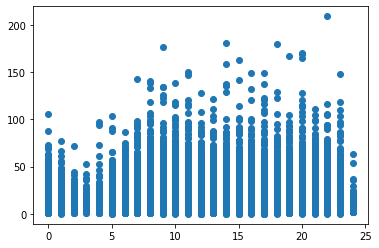

In [390]:
# plot of arrival hour vs taxi in time
plt.scatter(taxi_df['arr_hour'], taxi_df['taxi_in'])
plt.show()

In [391]:
taxi_df['dep_hour'] = taxi_df['dep_time'].astype('str').str[:-4]
taxi_df['dep_hour'] = taxi_df.dep_hour.replace('', 0)
taxi_df['dep_hour'] = taxi_df.dep_hour.replace('1335.3619765', 12)
taxi_df['dep_hour'] = taxi_df.dep_hour.astype('int')
taxi_df.dep_hour.unique()

<ipython-input-391-05cc9e66f03d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_df['dep_hour'] = taxi_df['dep_time'].astype('str').str[:-4]
<ipython-input-391-05cc9e66f03d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_df['dep_hour'] = taxi_df.dep_hour.replace('', 0)
<ipython-input-391-05cc9e66f03d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

array([14, 10, 17, 22,  6, 18, 19, 11, 23,  7, 12, 16,  9, 20, 21, 13,  4,
        5,  8, 15,  0,  1,  2,  3, 24])

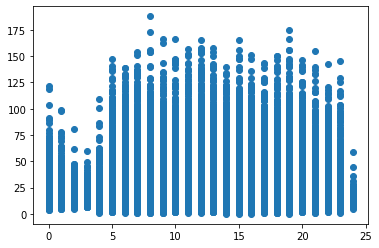

In [224]:
# plot of departure hour vs taxi-out time
plt.scatter(taxi_df['dep_hour'], taxi_df['taxi_out'])
plt.show()

In [392]:
taxi_df = taxi_df.rename(columns={'fl_date': 'date'})
taxi_df.head()

date  taxi_out   taxi_in  origin_airport_id  dest_airport_id  \
fl_date                                                                         
2018-10-26 2018-10-26      16.0  5.000000              12954            11057   
2018-03-26 2018-03-26      14.0  5.000000              13930            11630   
2019-02-06 2019-02-06      14.0  7.682555              10868            14771   
2019-11-11 2019-11-11      11.0  8.000000              14869            12892   
2019-03-25 2019-03-25      14.0  4.000000              14771            14107   

            dep_time  arr_time  flights  arr_hour  dep_hour  
fl_date                                                      
2018-10-26    1439.0    1650.0      1.0        16        14  
2018-03-26    1054.0    1207.0      1.0        12        10  
2019-02-06    1740.0    1853.0      1.0        18        17  
2019-11-11    1731.0     613.0      1.0         6        17  
2019-03-25    1410.0    1138.0      1.0        11        14

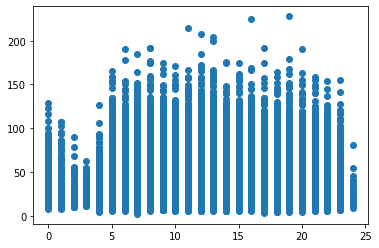

In [394]:
# plot total taxi times vs hour
taxi_df['total_taxi_time'] = taxi_df['taxi_out'] + taxi_df['taxi_in']
plt.scatter(taxi_df['dep_hour'], taxi_df['total_taxi_time'])
plt.show()

In [395]:
# check for significance taxi-out vs. dep_hour
dep_hour = [x for x in taxi_df['dep_hour'].tolist()]
taxi_out = [x for x in taxi_df['taxi_out'].tolist()]
stat, p = pearsonr(dep_hour, taxi_out)
alpha = 0.05
if p < 0.05:
    print("Hour and taxi_out correlated")
else:
    print("Maybe not correlated")

Maybe not correlated


In [396]:
# check for significance taxi-in vs. arr_hour
arr_hour = [x for x in taxi_df['arr_hour'].tolist()]
taxi_in = [x for x in taxi_df['taxi_in'].tolist()]
stat, p = pearsonr(arr_hour, taxi_in)
alpha = 0.05
if p < 0.05:
    print("arr_hour and taxi_in correlated")
else:
    print("Maybe not correlated")

Maybe not correlated


In [397]:
# check for significance total_taxi_time vs. arr_hour
taxi_time = [x for x in taxi_df['total_taxi_time'].tolist()]
stat, p = pearsonr(arr_hour, taxi_time)
alpha = 0.05
if p < 0.05:
    print("arr_hour and total_taxi_time correlated")
else:
    print("Maybe not correlated")

Maybe not correlated


In [398]:
# check for significance total_taxi_time vs. dep_hour
stat, p = pearsonr(dep_hour, taxi_time)
alpha = 0.05
if p < 0.05:
    print("dep_hour and total_taxi_time correlated")
else:
    print("Maybe not correlated")

Maybe not correlated


In [399]:
taxi_df.head()

date  taxi_out   taxi_in  origin_airport_id  dest_airport_id  \
fl_date                                                                         
2018-10-26 2018-10-26      16.0  5.000000              12954            11057   
2018-03-26 2018-03-26      14.0  5.000000              13930            11630   
2019-02-06 2019-02-06      14.0  7.682555              10868            14771   
2019-11-11 2019-11-11      11.0  8.000000              14869            12892   
2019-03-25 2019-03-25      14.0  4.000000              14771            14107   

            dep_time  arr_time  flights  arr_hour  dep_hour  total_taxi_time  
fl_date                                                                       
2018-10-26    1439.0    1650.0      1.0        16        14        21.000000  
2018-03-26    1054.0    1207.0      1.0        12        10        19.000000  
2019-02-06    1740.0    1853.0      1.0        18        17        21.682555  
2019-11-11    1731.0     613.0      1.0         6        17        19.000000  
2019-03-25    1410.0    1138.0      1.0        11        14        18.000000

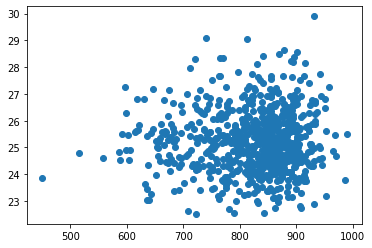

In [400]:
# Plot of daily flights vs. total taxi time
x = taxi_df[['flights']].groupby('fl_date').count()
y = taxi_df[['total_taxi_time']].groupby('fl_date').mean()

plt.scatter(x,y)
plt.show()

In [401]:
# check for significance total_taxi_time vs. daily_flights
num_flights = [int(x) for x in taxi_df[['flights']].groupby('fl_date').count().values]
taxi_time = [int(x) for x in taxi_df[['total_taxi_time']].groupby('fl_date').mean().values]

stat, p = pearsonr(num_flights, taxi_time)
alpha = 0.05
if p < 0.05:
    print("daily_flights and total_taxi_time correlated")
else:
    print("Maybe not correlated")

Maybe not correlated


#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [249]:
fl_df.head()

fl_date mkt_unique_carrier branded_code_share mkt_carrier  \
fl_date                                                                   
2018-10-26 2018-10-26                 UA                 WN          WN   
2018-03-26 2018-03-26                 DL                 UA          UA   
2019-02-06 2019-02-06                 WN                 NK          NK   
2019-11-11 2019-11-11                 DL                 DL          DL   
2019-03-25 2019-03-25                 WN                 WN          WN   

            mkt_carrier_fl_num op_unique_carrier tail_num  op_carrier_fl_num  \
fl_date                                                                        
2018-10-26                4052                EV   N8541W               2542   
2018-03-26                2733                DL   N938FR                351   
2019-02-06                5531                OO   N367CA               6266   
2019-11-11                 629                B6   N907WN               4607   
2019-03-25                 296                HA   N434YX               4535   

            origin_airport_id origin  ... arr_time  arr_delay cancelled  \
fl_date                               ...                                 
2018-10-26              12954    LGB  ...   1650.0      -16.0       0.0   
2018-03-26              13930    ORD  ...   1207.0      -19.0       0.0   
2019-02-06              10868    CAE  ...   1853.0       14.0       0.0   
2019-11-11              14869    SLC  ...    613.0       -7.0       0.0   
2019-03-25              14771    SFO  ...   1138.0       25.0       0.0   

           diverted  dup  crs_elapsed_time  actual_elapsed_time  air_time  \
fl_date                                                                     
2018-10-26      0.0    N              84.0                 90.0      67.0   
2018-03-26      0.0    N             215.0                148.0     116.0   
2019-02-06      0.0    N             114.0                 81.0      67.0   
2019-11-11      0.0    N             188.0                207.0     186.0   
2019-03-25      0.0    N              70.0                118.0      92.0   

            flights  distance  
fl_date                        
2018-10-26      1.0     528.0  
2018-03-26      1.0     404.0  
2019-02-06      1.0      93.0  
2019-11-11      1.0     315.0  
2019-03-25      1.0     388.0  

[5 rows x 32 columns]

In [309]:
delay_types = fl_df[['op_carrier_fl_num','dep_delay','arr_delay']]

In [310]:
delay_types['change_delay'] = delay_types['arr_delay'] - delay_types['dep_delay']

<ipython-input-310-fdabd9113d95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_types['change_delay'] = delay_types['arr_delay'] - delay_types['dep_delay']


In [311]:
delay_types.head()

op_carrier_fl_num  dep_delay  arr_delay  change_delay
fl_date                                                          
2018-10-26               2542       -6.0      -16.0         -10.0
2018-03-26                351       -7.0      -19.0         -12.0
2019-02-06               6266       16.0       14.0          -2.0
2019-11-11               4607       24.0       -7.0         -31.0
2019-03-25               4535       -4.0       25.0          29.0

In [312]:
delay_types['percent_dep'] = (delay_types['dep_delay']/(delay_types['dep_delay'] + delay_types['arr_delay'])) * 100

<ipython-input-312-88e9a878ce90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_types['percent_dep'] = (delay_types['dep_delay']/(delay_types['dep_delay'] + delay_types['arr_delay'])) * 100


In [308]:
for i in range(delay_types.shape[0]):
    x = delay_types.iloc[i]['dep_delay']
    y = delay_types.iloc[i]['arr_delay']
    if (x + y) == 0:
        delay_types.iloc[i]['percent_dep'] = 0
    else:
        delay_types.iloc[i]['percent_dep'] = (x/(x+y))*100

<ipython-input-308-0eb6d8e52f94>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_types.iloc[i]['percent_dep'] = (x/(x+y))*100
<ipython-input-308-0eb6d8e52f94>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_types.iloc[i]['percent_dep'] = 0


KeyboardInterrupt: 

In [316]:
delay_types['percent_dep'] = delay_types['percent_dep'].fillna(0.0)

<ipython-input-316-b5c06a97589f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_types['percent_dep'] = delay_types['percent_dep'].fillna(0.0)


In [318]:
import numpy as np

delay_types = delay_types.replace([np.inf, -np.inf], 0.0)

In [321]:
delay_types[['change_delay', 'percent_dep']].describe()

change_delay    percent_dep
count  600000.000000  600000.000000
mean       -4.916896      34.429550
std        68.927321     202.686150
min     -1925.000000   -7800.000000
25%       -19.000000      -1.272670
50%        -6.000000      24.000000
75%         9.000000      71.428571
max      2602.000000    5000.000000

In [322]:
# summarizing...
# airlines can ofen make up for a delay in departure
# the departure delay makes up ~34% of the delay time on average

#### **Task 6**: How many states cover 50% of US air traffic? 

In [408]:
traffic_df = fl_df[['origin_airport_id','origin','origin_city_name','dest_airport_id','dest','dest_city_name','flights']]

In [409]:
# count total flights
traffic_df.flights.sum()

600000.0

In [412]:
# sum flights by airport
traffic_df = traffic_df.groupby('origin_city_name').sum().sort_values('flights', ascending=False)

In [413]:
traffic_df.head()

origin_airport_id  dest_airport_id  flights
origin_city_name                                                  
Chicago, IL                    459478861        458491865  36255.0
Atlanta, GA                    373861487        376121227  29539.0
New York, NY                   287172476        285973462  22628.0
Dallas/Fort Worth, TX          278887918        282514795  21987.0
Denver, CO                     263014042        266994445  20740.0

In [418]:
# percent total per aiport
traffic_df['percent_total'] = traffic_df['flights']/traffic_df.flights.sum()

In [420]:
# cumulate sum of percentage
traffic_df['cumsum_percent'] = traffic_df['percent_total'].cumsum()

In [433]:
top_50 = traffic_df.loc[traffic_df['cumsum_percent'] <= 0.5]

In [ ]:
top_50.reset_index(inplace=True)

In [453]:
top_50['state'] = [x.split(',')[1] for x in top_50['origin_city_name'].values]

<ipython-input-453-38ac135e7e02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50['state'] = [x.split(',')[1] for x in top_50['origin_city_name'].values]


origin_city_name  origin_airport_id  dest_airport_id  flights  \
0            Chicago, IL          459478861        458491865  36255.0   
1            Atlanta, GA          373861487        376121227  29539.0   
2           New York, NY          287172476        285973462  22628.0   
3  Dallas/Fort Worth, TX          278887918        282514795  21987.0   
4             Denver, CO          263014042        266994445  20740.0   

     cumsum  percent_total  cumsum_percent state  
0   36255.0       0.060425        0.060425    IL  
1   65794.0       0.049232        0.109657    GA  
2   88422.0       0.037713        0.147370    NY  
3  110409.0       0.036645        0.184015    TX  
4  131149.0       0.034567        0.218582    CO

In [458]:
top_states = top_50.state.unique().tolist()

In [459]:
top_states

[' IL',
 ' GA',
 ' NY',
 ' TX',
 ' CO',
 ' CA',
 ' NC',
 ' DC',
 ' WA',
 ' AZ',
 ' MI',
 ' NV',
 ' MN',
 ' NJ']

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?